# EDA Lab

## Matplotlib - Data visualization


### 1. Basic Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# inline plot (for jupyter)
%matplotlib inline



In [133]:
#!pip install matplotlib

#### Parts of a Figure
- The **Figure** keeps track of all the child Axes
- An **Axes** is an Artist attached to a Figure that contains a region for plotting data
- Everything visible on the Figure is an **Artist**

<img src='https://matplotlib.org/stable/_images/anatomy.png'>/<img>

#### Draw the cosine and sine functions on the same plot

In [134]:
#Get the data for the sine and cosine functions

# X is now a NumPy array with 256 values ranging from -π to +π (included). 
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)  #alos including pivalue

# C is the cosine (256 values) and S is the sine (256 values).
C, S = np.cos(X), np.sin(X)

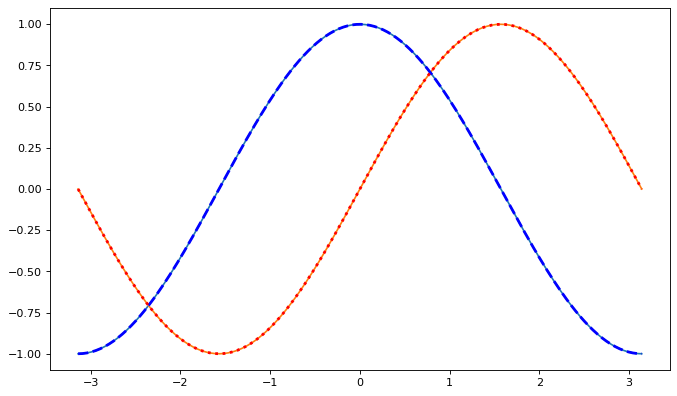

In [135]:
plt.figure(figsize=(10,6), dpi=80)
plt.plot(X,C)
plt.plot(X,S)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="--")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle=":")

### Points
- Matplotlib comes with a set of default settings that allow customizing all kinds of properties. 
- You can control the defaults in matplotlib: figure size and dpi, line width, color and style, axes, axis and grid properties, text and font properties and so on. 
- Matplotlib defaults are good in most cases, you can modify some properties for specific cases.

### Pyplot and its functionalities


#### Example 1

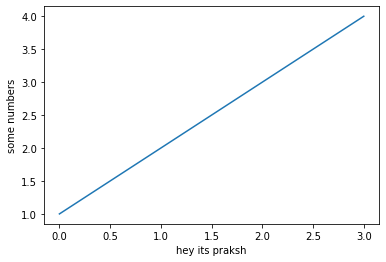

In [136]:
plt.plot([1,2,3,4])
plt.xlabel('hey its praksh')
plt.ylabel('some numbers')
plt.show()

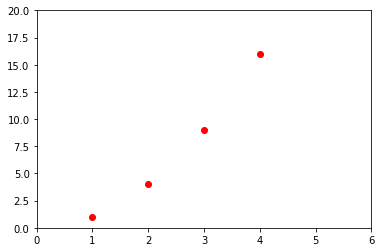

In [137]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro') #rs   # 3rd option is format string that indicates the color and line type of the plot (default ‘b-‘, which is a solid blue line)
plt.axis([0, 6, 0, 20])                 # [xmin, xmax, ymin, ymax]
plt.show()

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


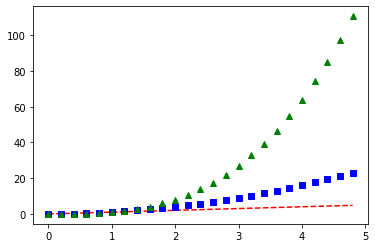

In [138]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
print(t)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

#### Example 2: Multiple Figures - Subplots

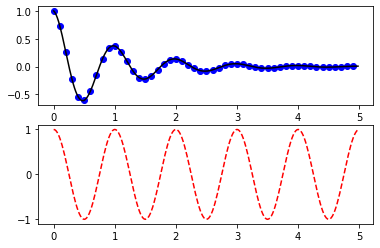

In [139]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)     # The subplot() command specifies numrows, numcols, fignum where fignum ranges from 1 to numrows*numcols. 
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')  #k-->default line colour:black
#plt.plot(t1, f(t1), 'bo') #CHECK 
plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

#### Example 3

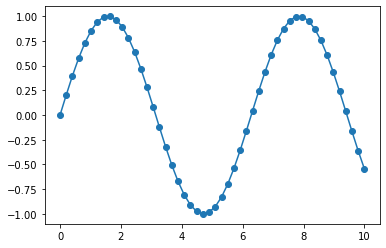

In [140]:
#Using linspace
x = np.linspace(0, 10, 50)
sinus = np.sin(x)
plt.plot(x, sinus,marker="o")
plt.show()

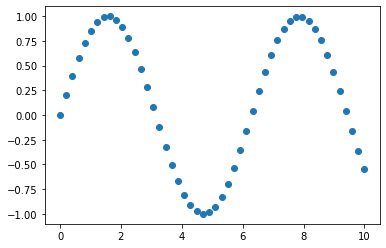

In [141]:
plt.plot(x, sinus, "o")
plt.show()
# use plt.plot to get color / marker abbreviations

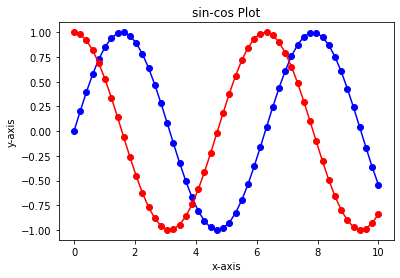

In [142]:
# Rapid multiplot
cosinus = np.cos(x)
plt.plot(x, sinus, "-b", x, sinus, "ob", x, cosinus, "-r", x, cosinus, "or")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('sin-cos Plot')
plt.show()

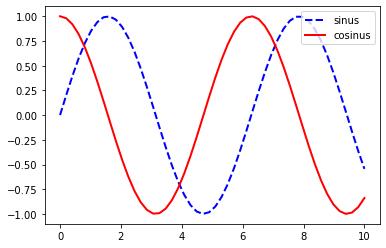

In [143]:
# Step by step
plt.plot(x, sinus, label='sinus', color='blue', linestyle='--', linewidth=2)
plt.plot(x, cosinus, label='cosinus', color='red', linestyle='-', linewidth=2)
plt.legend(loc='upper right')
plt.show()

### Lambda functions in python
- A lambda function evaluates an expression for a given argument. 
- **lambda argument(s): expression**

In [144]:
#Normal python function
def a_name(x):             
    return x+x

#Lambda function  /// used mainly for large functions
lambda x: x+x

<function __main__.<lambda>(x)>

In [145]:
# Scalar values
(lambda x: x*2)(12)        # immediately invoked function expression
###Results     24

24

#### Lambda with Apply() function by Pandas
 - This function applies an operation to every element of the column.

In [146]:
# Members of a family with DoB
import pandas as pd
df = pd.DataFrame({
    'Name': ['Luke','Gina','Sam','Emma'],
    'Status': ['Father', 'Mother', 'Son', 'Daughter'],
    'Birthyear': [1976, 1984, 2013, 2016],
})

df

,Name,Status,Birthyear
0,Luke,Father,1976
1,Gina,Mother,1984
2,Sam,Son,2013
3,Emma,Daughter,2016


In [147]:
# Get the current age of each member
df['age'] = df['Birthyear'].apply(lambda x: 2021-x)  # inside .apply(def(x)) can also be used
df

,Name,Status,Birthyear,age
0,Luke,Father,1976,45
1,Gina,Mother,1984,37
2,Sam,Son,2013,8
3,Emma,Daughter,2016,5


#### Lambda on Dataframe object

In [148]:
# convert to lower-case
df[['Name','Status']] = df.apply(lambda x: x[['Name','Status']].str.lower(), axis=1)  
# use axis=1 so that the expression is applied columnwise
df

,Name,Status,Birthyear,age
0,luke,father,1976,45
1,gina,mother,1984,37
2,sam,son,2013,8
3,emma,daughter,2016,5


### 2. Scatter (2D) plots


#### Load dataset

In [243]:
import pandas as pd 

try:
    salary = pd.read_csv("./datasets/salary_table.csv") 
except:
    url = 'https://github.com/shankargsetty/EDA2022/blob/main/datasets/salary_table.csv'
    salary = pd.read_csv(url)

df = salary
df

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N
5,20872,2,Master,Y
6,11772,2,Master,N
7,10535,2,Bachelor,N
8,12195,2,Ph.D,N
9,12313,3,Master,N


#### Simple scatter with colors


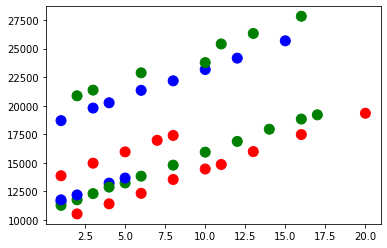

In [256]:
colors = colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'} 
plt.scatter(df['experience'], df['salary'], c=df['education'].apply(lambda x: colors[x]),s=100) # 'c' is arguement for color in scatteplt

#### Scatter plot with colors and symbols

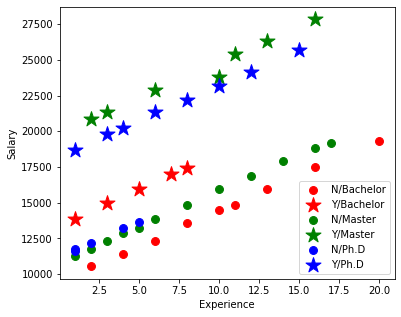

In [259]:
## Figure size
plt.figure(figsize=(6,5))

## Define colors / symbols manually
symbols_manag = dict(Y='*', N='.')
colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'b'}

## group by education x management => 6 groups
for values, d in salary.groupby(['education','management']):
    edu, manager = values
    plt.scatter(d['experience'], d['salary'], marker=symbols_manag[manager], 
                color=colors_edu[edu],s=250, label=manager+"/"+edu)
## Set labels

plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend(loc=4)  # lower right
plt.show()

### 3. Saving Figures

In [260]:
### bitmap format
plt.plot(x, sinus)
plt.savefig("sinus.png")
plt.close()

# Prefer vectorial format (SVG: Scalable Vector Graphics) can be edited with
# Inkscape, Adobe Illustrator, Blender, etc.
plt.plot(x, sinus)
plt.savefig("sinus.svg")
plt.close()

# Or pdf
plt.plot(x, sinus)
plt.savefig("sinus.pdf")
plt.close()

### Gallery of plots
- https://matplotlib.org/stable/gallery/index.html


### Reference
- https://matplotlib.org/stable/tutorials/index.html
    